In [1]:
import os
import sys

import astropy.units as u
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

project_path = "/Users/adrian/projects/kinematic-consensus/"
if project_path not in sys.path:
    sys.path.append(project_path)
import kingkong

In [34]:
# first generate stream data
np.random.seed(42)
mock = kingkong.MockStream(r0=9., v0=0.5, nsteps_per_period=128)

# observational uncertainties
V_obs = np.zeros_like(mock.Y)
V_obs[:,0] = 1E-5
V_obs[:,1] = 1E-5
V_obs[:,2] = 0.1 * mock.Y[:,2] # 10% distance error
V_obs[:,3] = (1*u.mas/u.yr).to(u.rad/u.Myr).value
V_obs[:,4] = (1*u.mas/u.yr).to(u.rad/u.Myr).value
V_obs[:,5] = (1.*u.km/u.s).to(u.kpc/u.Myr).value
V_obs = V_obs**2.

ix = np.random.randint(mock.K, size=8)
data = kingkong.StreamData(mock.Y[ix], V_obs[ix])

In [35]:
r0s = np.linspace(5,15,64)
derps = np.zeros_like(r0s)
for i,r0 in enumerate(r0s):
    _mock = kingkong.MockStream(r0=r0, v0=0.5, nsteps_per_period=128, quaternion=mock.quaternion)
    chisq_nk = _mock.compute_statistic(data)
    derps[i] = np.sum(chisq_nk.min(axis=1) < 10.)

---

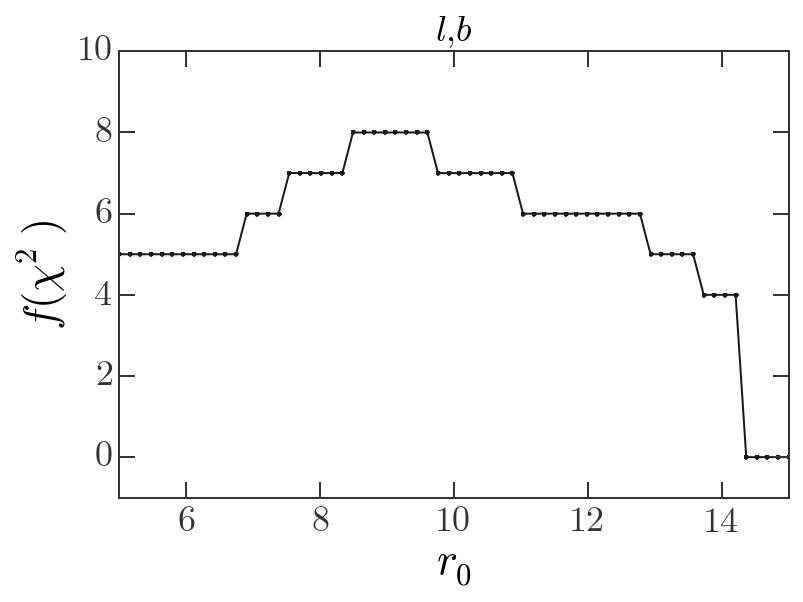

In [37]:
pl.plot(r0s, derps_lb)
pl.xlabel('$r_0$')
pl.ylabel(r'$f(\chi^2)$')
pl.xlim(5,15)
pl.ylim(-1,10)
pl.title("$l$,$b$", fontsize=18)

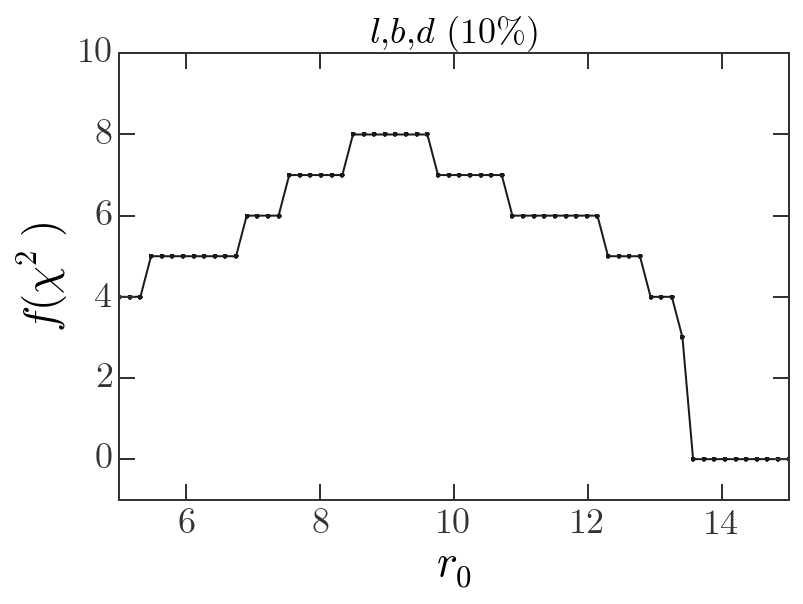

In [38]:
pl.plot(r0s, derps_lbd)
pl.xlabel('$r_0$')
pl.ylabel(r'$f(\chi^2)$')
pl.xlim(5,15)
pl.ylim(-1,10)
pl.title("$l$,$b$,$d$ (10%)", fontsize=18)

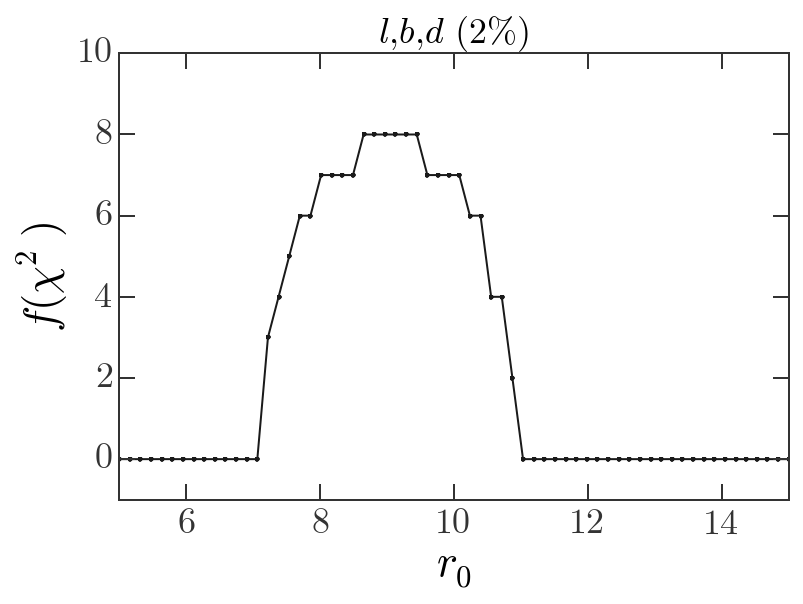

In [39]:
pl.plot(r0s, derps_lbd2)
pl.xlabel('$r_0$')
pl.ylabel(r'$f(\chi^2)$')
pl.xlim(5,15)
pl.ylim(-1,10)
pl.title("$l$,$b$,$d$ (2%)", fontsize=18)

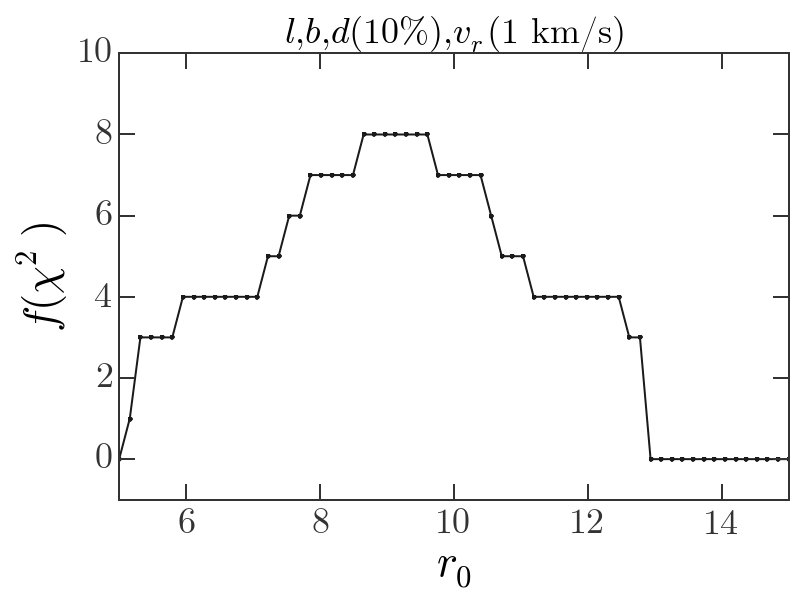

In [40]:
pl.plot(r0s, derps_lbdvr)
pl.xlabel('$r_0$')
pl.ylabel(r'$f(\chi^2)$')
pl.xlim(5,15)
pl.ylim(-1,10)
pl.title("$l$,$b$,$d$(10%),$v_r$(1 km/s)", fontsize=18)

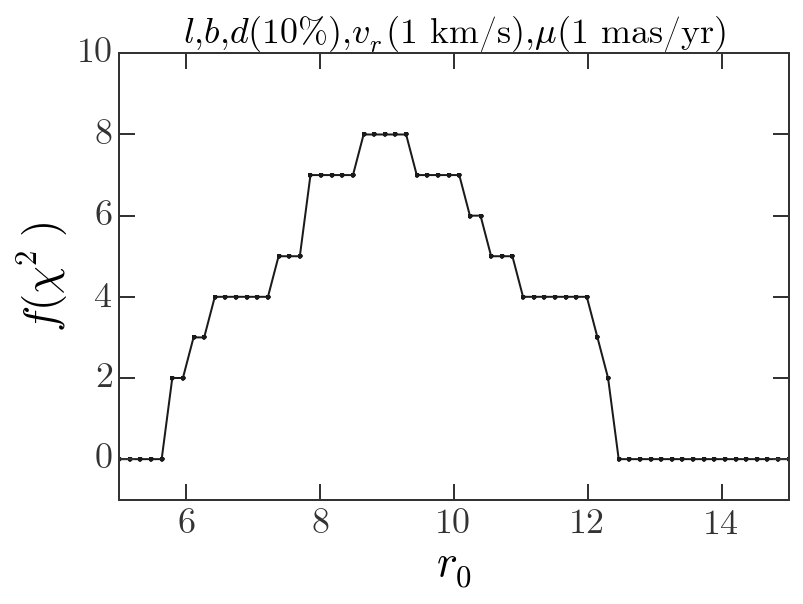

In [41]:
pl.plot(r0s, derps_lbdvrpm)
pl.xlabel('$r_0$')
pl.ylabel(r'$f(\chi^2)$')
pl.xlim(5,15)
pl.ylim(-1,10)
pl.title("$l$,$b$,$d$(10%),$v_r$(1 km/s),$\mu$(1 mas/yr)", fontsize=18)